In [1]:
%matplotlib inline

In [13]:
from kid_readout.analysis.resonator import plot_resonator
from kid_readout.measurement import basic, plot_basic
from kid_readout.measurement.io import npy

In [4]:
npd = npy.NumpyDirectory('/data/detectors/2016-12-12_143113_r1h11_lo_sweep.npd/')

In [5]:
npd.node_names()

['ADCSnap0',
 'ADCSnap1',
 'ADCSnap2',
 'ADCSnap3',
 'ADCSnap4',
 'ADCSnap5',
 'ADCSnap6',
 'ADCSnap7',
 'ADCSnap8',
 'SingleSweepStreamList9']

In [7]:
sssl = npd.SingleSweepStreamList9

In [22]:
[ss.tone_bin[0] for ss in sssl.stream_list]

[324, 325, 326, 327, 328, 329, 330, 331, 332]

In [26]:
[ss.filterbank_bin for ss in sssl.stream_list]

[41, 41, 41, 41, 41, 41, 41, 41, 41]

In [27]:
[ss.roach_state.lo_frequency for ss in sssl.stream_list]

[3368460000.0,
 3368427500.0,
 3368397500.0,
 3368365000.0,
 3368335000.0,
 3368302500.0,
 3368272500.0,
 3368240000.0,
 3368210000.0]

In [28]:
np.diff([ss.roach_state.lo_frequency for ss in sssl.stream_list])

array([-32500., -30000., -32500., -30000., -32500., -30000., -32500.,
       -30000.])

In [30]:
[ss.state.lo_valon.frequency_a for ss in sssl.stream_list]

[3368460000.0,
 3368427500.0,
 3368397500.0,
 3368365000.0,
 3368335000.0,
 3368302500.0,
 3368272500.0,
 3368240000.0,
 3368210000.0]

In [31]:
[ss.state.lo_valon.frequency_b for ss in sssl.stream_list]

[3368460000.0,
 3368427500.0,
 3368397500.0,
 3368365000.0,
 3368335000.0,
 3368302500.0,
 3368272500.0,
 3368240000.0,
 3368210000.0]

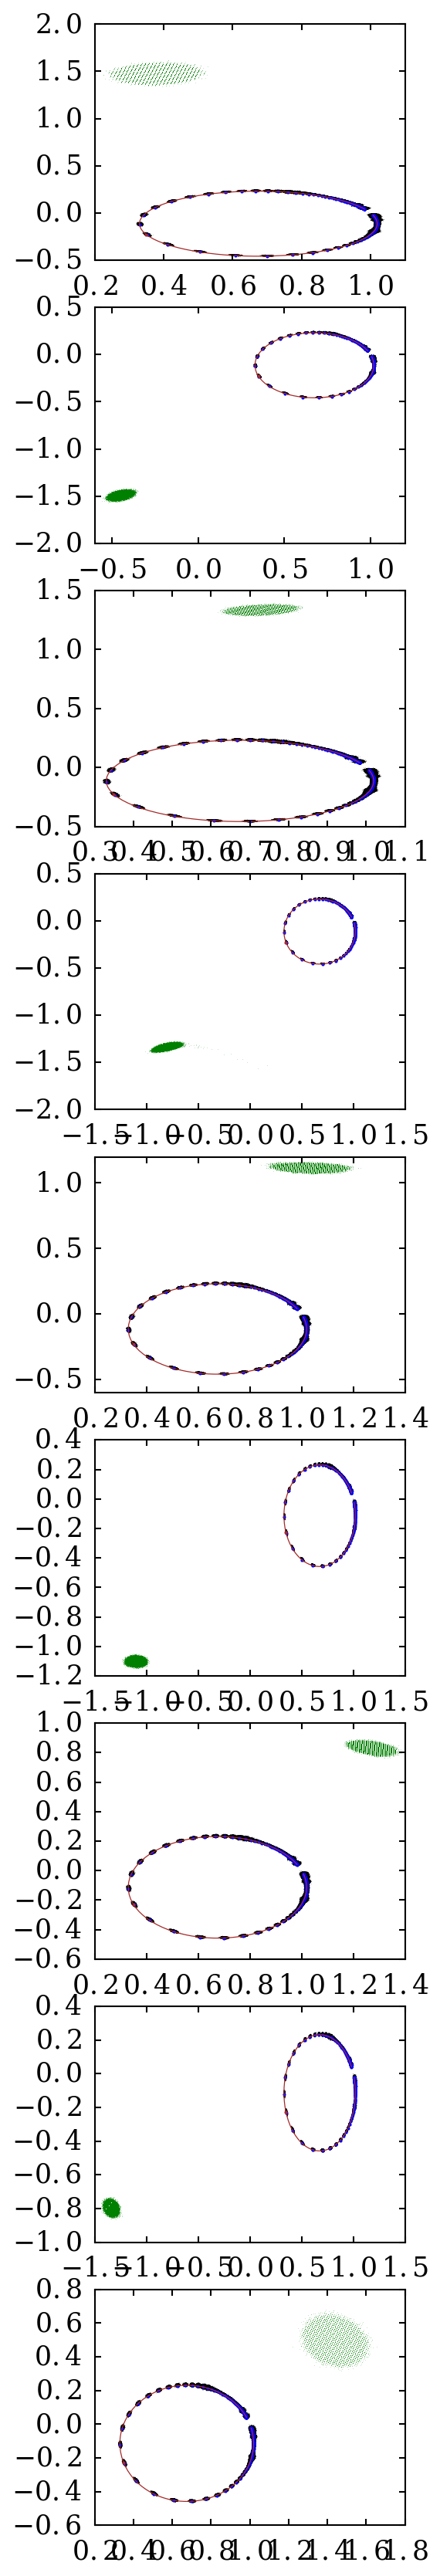

In [12]:
num_streams = len(sssl.stream_list)
fig, axes = plt.subplots(num_streams, 1, figsize=(2, 2 * num_streams))
for ss, ax in zip(sssl.stream_list, axes.flatten()):
    sss = basic.SingleSweepStream(sweep=sssl.sweep, stream=ss)
    plot_basic.sss_complex_plane(sss, ax)

(3378.5644786524799, 3378.6044786524799)

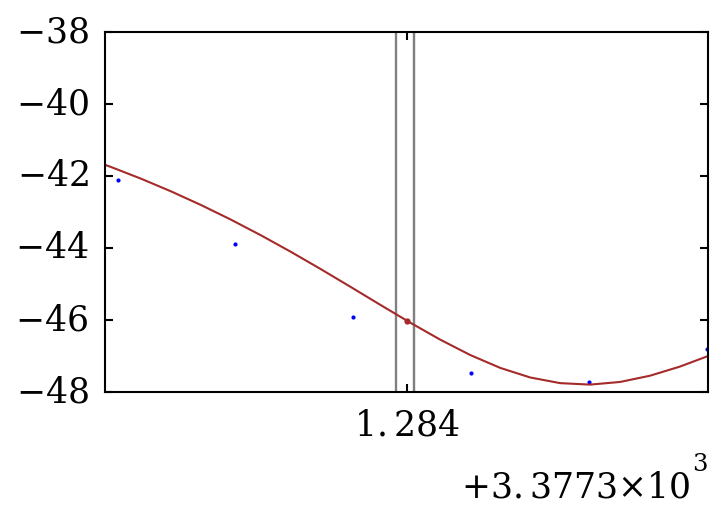

In [25]:
f_scale = 1e-6
fig, ax = plt.subplots()
for ss in sssl.stream_list:
    ax.axvline(f_scale * ss.frequency, color='gray')
plot_resonator.amplitude(ax, sssl.sweep.resonator, f_scale=f_scale)
ax.set_xlim(f_scale * (sssl.sweep.resonator.f_0 - 20e3),
            f_scale * (sssl.sweep.resonator.f_0 + 20e3))